In [388]:
import pandas as pd
import glob

path = "./raw_data/"

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

#df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], dayfirst=True)

df = df[df['Location of Monitoring Station'].isin(['Kathivakkam, Municipal Kalyana Mandapam, Chennai'])]

#df = df[df['Location of Monitoring Station'].isin(['Kathivakkam, Municipal Kalyana Mandapam, Chennai', 'Govt. High School, Manali, Chennai.','Thiruvottiyur,  Chennai'])]

In [389]:
df=df.drop(['State','City/Town/Village/Area','Agency', 'Type of Location', 'Stn Code'], axis=1)

In [390]:
df

,Sampling Date,Location of Monitoring Station,SO2,NO2,RSPM/PM10,SPM,PM 2.5
0,1/5/2010,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",9.60,17.166667,73.333333,149.666667,NaN
1,1/7/2010,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",11.15,20.283333,61.333333,150.333333,NaN
2,1/12/2010,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",12.45,20.516667,75.000000,114.666667,NaN
3,19-01-10,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",10.75,18.183333,120.000000,197.666667,NaN
4,21-01-10,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",9.78,17.320000,96.500000,216.000000,NaN
...,...,...,...,...,...,...,...
10130,15-12-15,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",13.00,14.000000,37.000000,NaN,20.0
10131,17-12-15,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",15.00,15.000000,32.000000,NaN,17.0
10132,22-12-15,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",14.00,16.000000,32.000000,NaN,18.0
10133,29-12-15,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",12.00,17.000000,44.000000,NaN,25.0


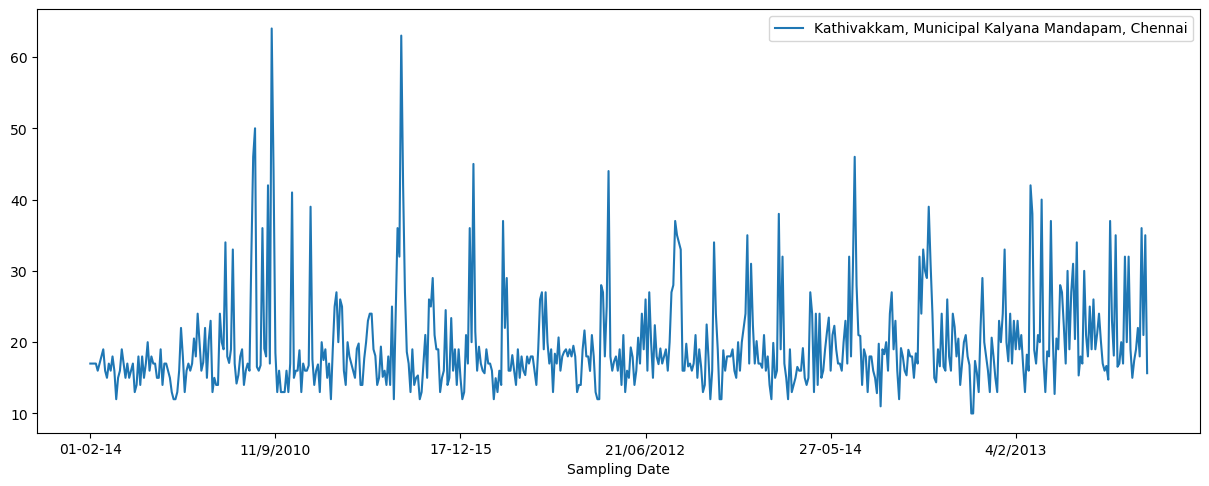

In [391]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pivot_df = pd.pivot_table(df, values='NO2', index='Sampling Date', columns='Location of Monitoring Station')
pivot_df = pivot_df.interpolate(method='linear')
pivot_df.plot()
plt.legend()

plt.rcParams["figure.figsize"] = (15,5.5)


plt.show()

In [392]:
print(df)

print(df.dtypes)

df['Sampling Date'] = np.where(df['Sampling Date'].str.contains('/'), pd.to_datetime(df['Sampling Date']).dt.strftime('%m/%d/%Y'), pd.to_datetime(df['Sampling Date'], dayfirst=True).dt.strftime('%m/%d/%Y'))
df=df.set_index('Sampling Date')
df.to_csv('data.csv')

      Sampling Date                    Location of Monitoring Station    SO2  \
0          1/5/2010  Kathivakkam, Municipal Kalyana Mandapam, Chennai   9.60   
1          1/7/2010  Kathivakkam, Municipal Kalyana Mandapam, Chennai  11.15   
2         1/12/2010  Kathivakkam, Municipal Kalyana Mandapam, Chennai  12.45   
3          19-01-10  Kathivakkam, Municipal Kalyana Mandapam, Chennai  10.75   
4          21-01-10  Kathivakkam, Municipal Kalyana Mandapam, Chennai   9.78   
...             ...                                               ...    ...   
10130      15-12-15  Kathivakkam, Municipal Kalyana Mandapam, Chennai  13.00   
10131      17-12-15  Kathivakkam, Municipal Kalyana Mandapam, Chennai  15.00   
10132      22-12-15  Kathivakkam, Municipal Kalyana Mandapam, Chennai  14.00   
10133      29-12-15  Kathivakkam, Municipal Kalyana Mandapam, Chennai  12.00   
10134      31-12-15  Kathivakkam, Municipal Kalyana Mandapam, Chennai  12.00   

             NO2   RSPM/PM10         SP

C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_40456\3976997146.py:5: UserWarning: Parsing '13/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Sampling Date'] = np.where(df['Sampling Date'].str.contains('/'), pd.to_datetime(df['Sampling Date']).dt.strftime('%m/%d/%Y'), pd.to_datetime(df['Sampling Date'], dayfirst=True).dt.strftime('%m/%d/%Y'))
C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_40456\3976997146.py:5: UserWarning: Parsing '18/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Sampling Date'] = np.where(df['Sampling Date'].str.contains('/'), pd.to_datetime(df['Sampling Date']).dt.strftime('%m/%d/%Y'), pd.to_datetime(df['Sampling Date'], dayfirst=True).dt.strftime('%m/%d/%Y'))
C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_40456\3976997146.py:5: UserWarning: Parsing '20/01/2011' in DD/MM/YYYY format. Provide format or sp

In [393]:
df2 = df.loc[:, 'NO2'].to_frame()

print(df2)

df2['NO2'] = df2['NO2'].interpolate(option='spline')

df2.to_csv('azure_train.csv')

df2['y'] = df2['NO2'].shift(-1)
print(df2.index)

print(df2.head(20))

                     NO2
Sampling Date           
01/05/2010     17.166667
01/07/2010     20.283333
01/12/2010     20.516667
01/19/2010     18.183333
01/21/2010     17.320000
...                  ...
12/15/2015     14.000000
12/17/2015     15.000000
12/22/2015     16.000000
12/29/2015     17.000000
12/31/2015     13.000000

[574 rows x 1 columns]
Index(['01/05/2010', '01/07/2010', '01/12/2010', '01/19/2010', '01/21/2010',
       '01/28/2010', '02/02/2010', '02/04/2010', '02/09/2010', '02/11/2010',
       ...
       '11/24/2015', '11/26/2015', '12/03/2015', '12/08/2015', '12/10/2015',
       '12/15/2015', '12/17/2015', '12/22/2015', '12/29/2015', '12/31/2015'],
      dtype='object', name='Sampling Date', length=574)
                     NO2          y
Sampling Date                      
01/05/2010     17.166667  20.283333
01/07/2010     20.283333  20.516667
01/12/2010     20.516667  18.183333
01/19/2010     18.183333  17.320000
01/21/2010     17.320000  20.866667
01/28/2010     20.86666

In [394]:
train = df2[:400]
test = df2[400:]
test = test.drop(test.tail(1).index) # Drop last row
print(f'Shape of training set: {train.shape}')
print(f'Shape of test set: {test.shape}')

Shape of training set: (400, 2)
Shape of test set: (173, 2)


In [395]:
test = test.copy()

test['baseline_pred'] = test['NO2']
print(test)

test.interpolate(method='linear', inplace=True)


                NO2     y  baseline_pred
Sampling Date                           
04/02/2014     17.0  16.0           17.0
06/02/2014     16.0  19.0           16.0
11/02/2014     19.0  14.0           19.0
02/13/2014     14.0  16.0           14.0
02/18/2014     16.0  14.0           16.0
...             ...   ...            ...
12/10/2015     13.0  14.0           13.0
12/15/2015     14.0  15.0           14.0
12/17/2015     15.0  16.0           15.0
12/22/2015     16.0  17.0           16.0
12/29/2015     17.0  13.0           17.0

[173 rows x 3 columns]


In [396]:
from sklearn.tree import DecisionTreeRegressor
X_train = train['NO2'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['NO2'].values.reshape(-1,1)
# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)
# Fit the model
dt_reg.fit(X=X_train, y=y_train)
# Make predictions
dt_pred = dt_reg.predict(X_test)
# Assign predictions to a new column in test
test['dt_pred'] = dt_pred

print(test)

                NO2     y  baseline_pred    dt_pred
Sampling Date                                      
04/02/2014     17.0  16.0           17.0  18.740741
06/02/2014     16.0  19.0           16.0  17.933333
11/02/2014     19.0  14.0           19.0  18.578947
02/13/2014     14.0  16.0           14.0  17.222222
02/18/2014     16.0  14.0           16.0  17.933333
...             ...   ...            ...        ...
12/10/2015     13.0  14.0           13.0  25.166667
12/15/2015     14.0  15.0           14.0  17.222222
12/17/2015     15.0  16.0           15.0  16.400000
12/22/2015     16.0  17.0           16.0  17.933333
12/29/2015     17.0  13.0           17.0  18.740741

[173 rows x 4 columns]


In [397]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred = gbr.predict(X_test)
test['gbr_pred'] = gbr_pred
print(test)

test.to_csv('lkamsldf.csv')

                NO2     y  baseline_pred    dt_pred   gbr_pred
Sampling Date                                                 
04/02/2014     17.0  16.0           17.0  18.740741  18.477102
06/02/2014     16.0  19.0           16.0  17.933333  18.063244
11/02/2014     19.0  14.0           19.0  18.578947  18.558380
02/13/2014     14.0  16.0           14.0  17.222222  17.353054
02/18/2014     16.0  14.0           16.0  17.933333  18.063244
...             ...   ...            ...        ...        ...
12/10/2015     13.0  14.0           13.0  25.166667  24.629695
12/15/2015     14.0  15.0           14.0  17.222222  17.353054
12/17/2015     15.0  16.0           15.0  16.400000  16.855894
12/22/2015     16.0  17.0           16.0  17.933333  18.063244
12/29/2015     17.0  13.0           17.0  18.740741  18.477102

[173 rows x 5 columns]


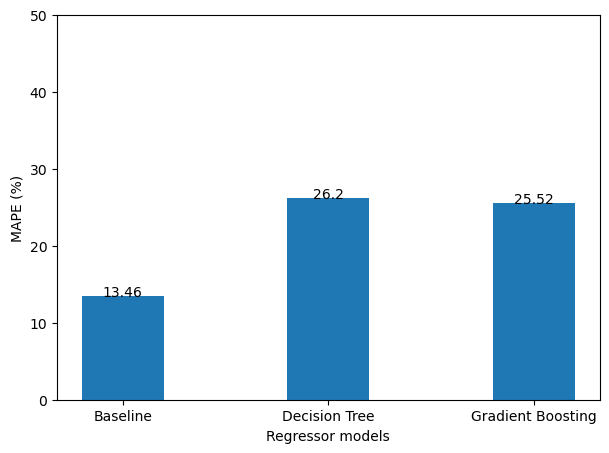

In [398]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

import numpy as np

baseline_mape = mape(test['y'], test['baseline_pred'])
dt_mape = mape(test['y'], test['dt_pred'])
gbr_mape = mape(test['NO2'], test['gbr_pred'])
# Generate bar plot
fig, ax = plt.subplots(figsize=(7, 5))
x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 50)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center')
    


plt.show()

In [ ]:
import torch
import numpy as np

# 1. Load necessary libraries
# (assuming your model architecture is defined in a separate file)
from my_model import MyModel

# 2. Define the model architecture and load the trained weights
model = MyModel()
model.load_state_dict(torch.load('model.pt'))

# 3. Load the data to forecast
data_to_forecast = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

# 4. Preprocess the data (assuming the model expects normalized data)
data_to_forecast_normalized = (data_to_forecast - mean) / std

# 5. Pass the data to the model and obtain predictions
with torch.no_grad():
    inputs = torch.tensor(data_to_forecast_normalized, dtype=torch.float32)
    predictions = model(inputs)

# 6. Postprocess the predictions (assuming the model outputs normalized data)
predictions_denormalized = predictions * std + mean
